In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.datasets import load_iris

In [12]:
iris = load_iris(as_frame = True)
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [23]:
iris_df = iris['frame']
display(
    iris_df.info(),
    iris_df.head(10)
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


None

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [201]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [207]:
target_dict = {1: 1, 
                 0: 0,
                 2: 0}
target_binrary = iris_df["target"].map(target_dict)

In [205]:
#target_01 = iris_df["target"].gt(0).astype(int)
#target_01 

In [209]:
iris_newdf = iris_df.merge(target_binrary, left_index=True, right_index = True)
iris_newdf

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_x,target_y
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


In [266]:
iris_newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target_x           150 non-null    int64  
 5   target_y           150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [210]:
X, y = iris_newdf[["sepal length (cm)", "petal width (cm)"]], iris_newdf["target_y"]

In [222]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y,
    train_size = 0.7,
    stratify = y,
    random_state = 30
)


In [223]:
y_test.value_counts()

0    30
1    15
Name: target_y, dtype: int64

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (cm)'>

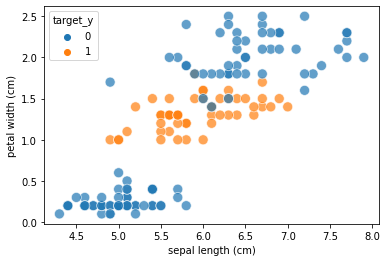

In [229]:
sns.scatterplot(data = iris_newdf,x = "sepal length (cm)", y = "petal width (cm)", hue = "target_y" ,s=100, alpha=0.7, palette='tab10')

# Logistic Regression

In [225]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)

LogisticRegression()

In [226]:
y_pred = logistic.predict(x_test)
print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy score:  66.66666666666666


In [228]:
display(
    metrics.f1_score(y_test, y_pred, average = "weighted"),
    metrics.precision_score(y_test, y_pred, average = "weighted"),
    metrics.recall_score(y_test, y_pred, average = "weighted")
)

/Users/trang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5333333333333333

0.4444444444444444

0.6666666666666666

# Decision Tree

In [247]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

<function matplotlib.pyplot.show(close=None, block=None)>

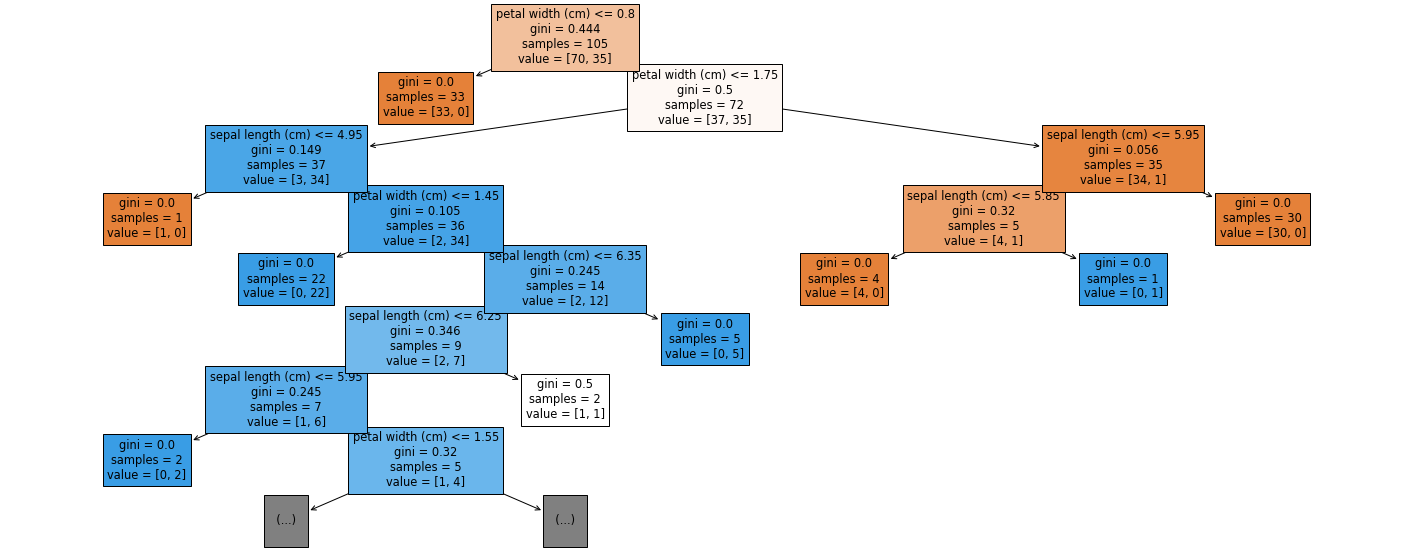

In [255]:
plt.figure(figsize = (25,10))
plottree = plot_tree(tree, feature_names = x_train.columns, max_depth =7, filled = True)
plt.show

In [232]:
y_pred = tree.predict(x_test)
print("Accuracy Scrore: ", metrics.accuracy_score(y_test, y_pred))


Accuracy Scrore:  0.8888888888888888


In [234]:
display(
    metrics.f1_score(y_test, y_pred, average = "weighted"),
    metrics.precision_score(y_test, y_pred, average = "weighted"),
    metrics.recall_score(y_test, y_pred, average = "weighted")
)

0.889739383998542

0.8915229885057471

0.8888888888888888

# Random Forest

In [242]:
forest = RandomForestClassifier(
        max_features = 2,
        max_depth = 7,
        n_estimators = 1000,
        random_state = 40
)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, max_features=2, n_estimators=1000,
                       random_state=40)

In [244]:
y_pred = tree.predict(x_test)
print("Accuracy Scrore: ", metrics.accuracy_score(y_test, y_pred))

Accuracy Scrore:  0.8888888888888888


In [245]:
display(
    metrics.f1_score(y_test, y_pred, average = "weighted"),
    metrics.precision_score(y_test, y_pred, average = "weighted"),
    metrics.recall_score(y_test, y_pred, average = "weighted")
)

0.889739383998542

0.8915229885057471

0.8888888888888888

In [246]:
print(len(forest.estimators_))
forest.estimators_[:5]

1000


[DecisionTreeClassifier(max_depth=7, max_features=2, random_state=1751002438),
 DecisionTreeClassifier(max_depth=7, max_features=2, random_state=618510555),
 DecisionTreeClassifier(max_depth=7, max_features=2, random_state=237795335),
 DecisionTreeClassifier(max_depth=7, max_features=2, random_state=481769637),
 DecisionTreeClassifier(max_depth=7, max_features=2, random_state=1239247864)]

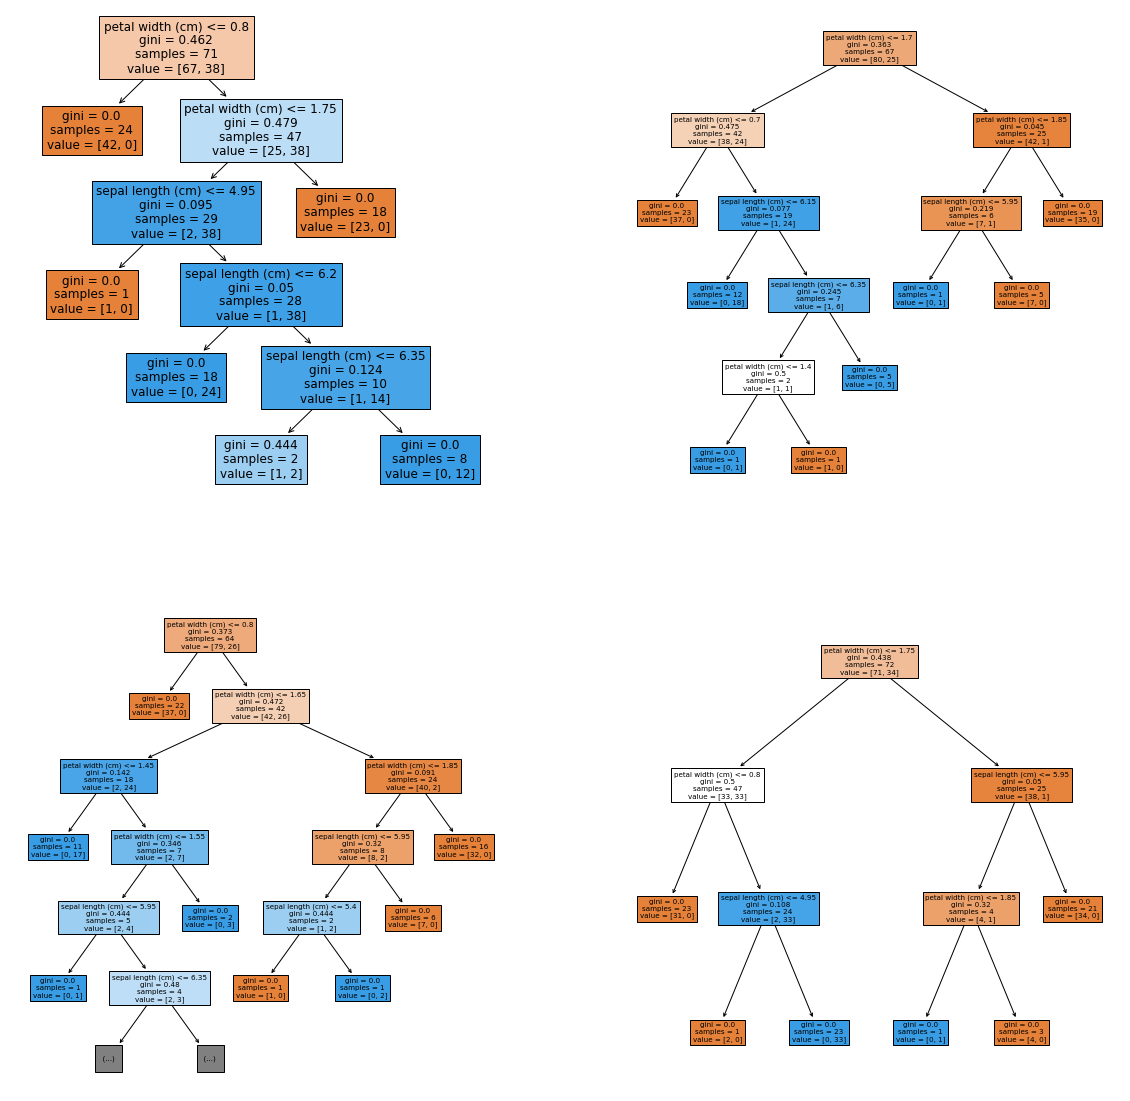

In [264]:
fig, axs = plt.subplots(2,2, figsize = (20, 20))
for tree, ax in zip(forest.estimators_[:4], axs.ravel()):
    plot_tree(tree, feature_names= x_train.columns, max_depth = 5, filled = True, ax= ax)